# Experiment on Overfitting Machine learning Models in Scikit-Learn

### What is overfitting ?
* ML model predicts well in train data set and perfrom poorly in holdout data set(test/validation).
* common cause for overfitting is “poor generalization” of the model as measured by high “generalization error.”


### Overfitting Analysis?
* Plot the model performance on train vs test data set on each instances or data points which is called learning curve.
* The common pattern or behavior for overfitting can be seen on learning curve plots, where model performance on the training dataset continues to improve (e.g. loss or error continues to fall or accuracy continues to rise) and performance on the test or validation set improves to a point and then begins to get worse.
* If this pattern is observed, then training should stop at that point where performance gets worse on the test or validation set for algorithms that learn incrementally

### Overfitting in Scikit-Learn
* Use a synthetic classification dataset.

* use the make_classification() function to define a binary (two class) classification prediction problem with 10,000 examples (rows) and 20 input features (columns).

* 

In [2]:
# synthetic classification dataset
from sklearn.datasets import make_classification
# define dataset

X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(10000, 20) (10000,)


#### use the train_test_split() function and split the data into 70 percent for training a model and 30 percent for evaluating it.

In [4]:
# split a dataset into train and test sets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 20) (3000, 20) (7000,) (3000,)


#### use a decision tree via the DecisionTreeClassifier and test different tree depths with the “max_depth” argument.

### Shallow decision trees (e.g. few levels) generally do not overfit but have poor performance (high bias, low variance). Whereas deep trees (e.g. many levels) generally do overfit and have good performance (low bias, high variance). A desirable tree is one that is not so shallow that it has low skill and not so deep that it overfits the training dataset.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# define the tree depths to evaluate
values = [i for i in range(1, 21)]
train_scores = []
test_acc = []
test_scores =[]

# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.771, test: 0.752
>2, train: 0.804, test: 0.808
>3, train: 0.882, test: 0.872
>4, train: 0.904, test: 0.892
>5, train: 0.910, test: 0.900
>6, train: 0.935, test: 0.916
>7, train: 0.945, test: 0.924
>8, train: 0.951, test: 0.925
>9, train: 0.959, test: 0.929
>10, train: 0.963, test: 0.927
>11, train: 0.971, test: 0.924
>12, train: 0.978, test: 0.922
>13, train: 0.982, test: 0.920
>14, train: 0.985, test: 0.918
>15, train: 0.988, test: 0.916
>16, train: 0.990, test: 0.913
>17, train: 0.992, test: 0.915
>18, train: 0.994, test: 0.910
>19, train: 0.996, test: 0.913
>20, train: 0.997, test: 0.915


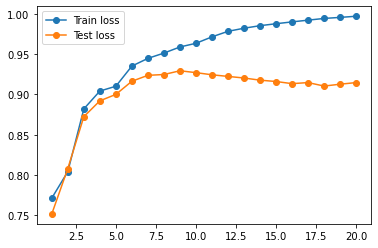

In [18]:

from matplotlib import pyplot 

# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train loss')
pyplot.plot(values, test_scores, '-o', label='Test loss')
pyplot.legend()
pyplot.show()


* <b>Running the example fits and evaluates a decision tree on the train and test sets for each tree depth and reports the accuracy scores.</b>
    
* <b> we can see a trend of increasing accuracy on the training dataset with the tree depth to a point around a depth of 19-20 levels where the tree fits the training dataset perfectly.
</b>    
* <b> We can also see that the accuracy on the test set improves with tree depth until a depth of about eight or nine levels, after which accuracy begins to get worse with each increase in tree depth </b>
* <b> This is exactly what we would expect to see in a pattern of overfitting.

</b>

>1, train: 0.771, test: 0.752 <br>
>2, train: 0.804, test: 0.808 <br>
>3, train: 0.882, test: 0.872 <br>
>4, train: 0.904, test: 0.892 <br>
>5, train: 0.910, test: 0.900 <br>
>6, train: 0.935, test: 0.916 <br>
>7, train: 0.945, test: 0.924 <br>
<b> >8, train: 0.951, test: 0.925 </b>  <br>
>9, train: 0.959, test: 0.929 <br>
>10, train: 0.963, test: 0.927 <br>
>11, train: 0.971, test: 0.924 <br> 
>12, train: 0.978, test: 0.922 <br>
>13, train: 0.982, test: 0.920 <br>
>14, train: 0.985, test: 0.918 <br>
>15, train: 0.988, test: 0.916 <br>
>16, train: 0.990, test: 0.913 <br>
>17, train: 0.992, test: 0.915 <br>
>18, train: 0.994, test: 0.910 <br>
>19, train: 0.996, test: 0.913 <br>
>20, train: 0.997, test: 0.915  <br>

The plot clearly shows that increasing the tree depth in the early stages results in a corresponding improvement in both train and test sets.

This continues until a depth of around 10 levels, after which the model is shown to overfit the training dataset at the cost of worse performance on the holdout dataset.


## Counterexample of Overfitting in Scikit-Learn

A good example of this is varying the number of neighbors for the k-nearest neighbors algorithms, which we can implement using the KNeighborsClassifier class and configure via the “n_neighbors” argument.

We can perform the same analysis of the KNN algorithm as we did in the previous section for the decision tree and see if our model overfits for different configuration values. In this case, we will vary the number of neighbors from 1 to 50 to get more of the effect.

>1, train: 1.000, test: 0.918
>2, train: 0.963, test: 0.911
>3, train: 0.958, test: 0.930
>4, train: 0.953, test: 0.929
>5, train: 0.955, test: 0.931
>6, train: 0.954, test: 0.931
>7, train: 0.951, test: 0.931
>8, train: 0.952, test: 0.931
>9, train: 0.951, test: 0.929
>10, train: 0.948, test: 0.928
>11, train: 0.947, test: 0.927
>12, train: 0.946, test: 0.928
>13, train: 0.947, test: 0.929
>14, train: 0.947, test: 0.931
>15, train: 0.946, test: 0.930
>16, train: 0.946, test: 0.930
>17, train: 0.946, test: 0.928
>18, train: 0.944, test: 0.929
>19, train: 0.943, test: 0.927
>20, train: 0.943, test: 0.927
>21, train: 0.941, test: 0.925
>22, train: 0.943, test: 0.926
>23, train: 0.943, test: 0.924
>24, train: 0.942, test: 0.926
>25, train: 0.942, test: 0.922
>26, train: 0.943, test: 0.923
>27, train: 0.942, test: 0.920
>28, train: 0.943, test: 0.922
>29, train: 0.941, test: 0.921
>30, train: 0.941, test: 0.921
>31, train: 0.940, test: 0.921
>32, train: 0.940, test: 0.922
>33, train: 0.940

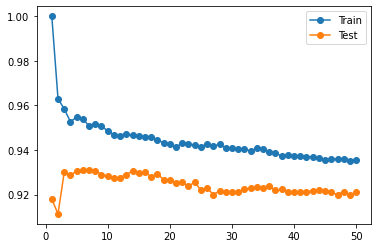

In [20]:
# evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

Running the example fits and evaluates a KNN model on the train and test sets for each number of neighbors and reports the accuracy scores.

#### Note: patter we are looking ?
we are looking for a pattern where performance on the test set improves and then starts to get worse, and performance on the training set continues to improve. we are not seeing this pattern

we see that accuracy on the training dataset starts at perfect accuracy and falls with almost every increase in the number of neighbors.

We also see that performance of the model on the holdout test improves to a value of about five neighbors, holds level and begins a downward trend after that.

### Points
* A figure is also created that shows line plots of the model accuracy on the train and test sets with different numbers of neighbors.

* The plots make the situation clearer. It looks as though the line plot for the training set is dropping to converge with the line for the test set. Indeed, this is exactly what is happening.
* The “model” is really just the entire training dataset stored in an efficient data structure. Skill for the “model” on the training dataset should be 100 percent and anything less is unforgivable.

Reference: https://machinelearningmastery.com/overfitting-machine-learning-models/